# Part II - (Loan Data from Prosper)
## by (Noura)

## Investigation Overview


> I want to show the effect of some features on the ProsperScore. 

> BorrowerAPR & ProsperScore have -ve correlation.

> Investors & ProsperScore have +ve correlation.

> Appearantly, Term doesn't have effect on the relationship between BorrowerAPR and ProsperScore.

> The positive correlation between Investors and ProsperScore tends to be strengthen as the ProsperRating (Alpha) increases.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After exploring the documentation, I picked 17 features that can be more important in this exploration.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe

loan_df = pd.read_csv('prosperLoanData.csv')

# Subset the dataframe by selecting features of interest

cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 
'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 
'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'Recommendations', 
'InvestmentFromFriendsCount', 'Investors']

loan_df = loan_df[cols]

# records with null BorrowerAPR need to be removed
loan_df = loan_df[~loan_df.BorrowerAPR.isna()]

# Convert ProsperRating (Alpha) into ordered categorical types
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> BorrowerAPR & ProsperScore have -ve correlation. ProsperScore or risk score is riskier with the high Borrower's Annual Percentage Rate (APR) for the loan.

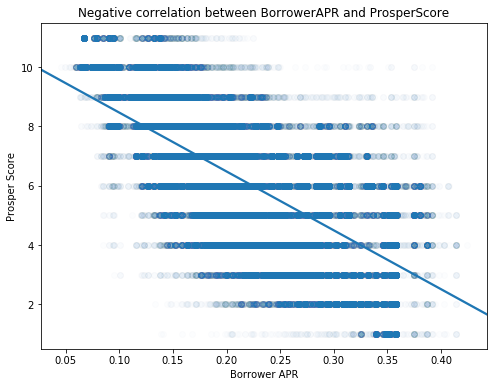

In [17]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_df, x = 'BorrowerAPR', y = 'ProsperScore', scatter_kws={'alpha':0.01})

plt.title("Negative correlation between BorrowerAPR and ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Prosper Score");

## (Visualization 2)

> Investors & ProsperScore have +ve correlation. ProsperScore tends to be less risky, with the highest number of investors that funded the loan.

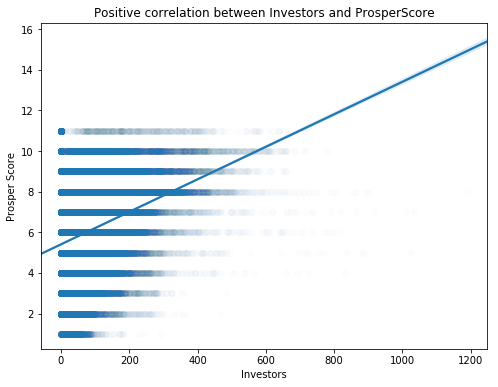

In [18]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_df, x = 'Investors', y = 'ProsperScore', scatter_kws={'alpha':0.01})

plt.title("Positive correlation between Investors and ProsperScore")
plt.xlabel("Investors")
plt.ylabel("Prosper Score");

## (Visualization 3)

> Appearantly, the Term or the length of the loan expressed in months doesn't have effect on the relationship between BorrowerAPR and ProsperScore.

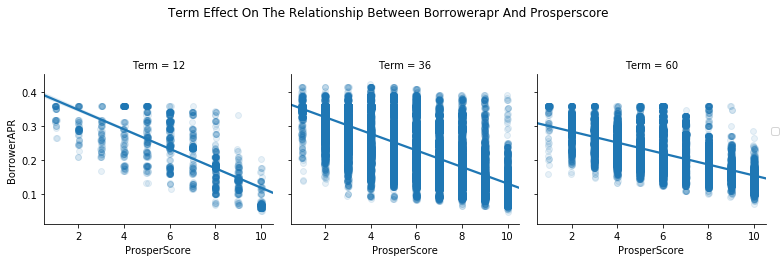

In [19]:
g=sb.FacetGrid(data=loan_df, aspect=1.2, col='Term', col_wrap=3)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1})
g.add_legend()
plt.suptitle("Term effect on the relationship between BorrowerAPR and ProsperScore".title(), 
             y = 1.2);

## (Visualization 4)

> The positive correlation between Investors and ProsperScore tends to be strengthen as the ProsperRating (Alpha) or the Prosper Rating assigned at the time the listing was created with the values: \[0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA\] increases. 

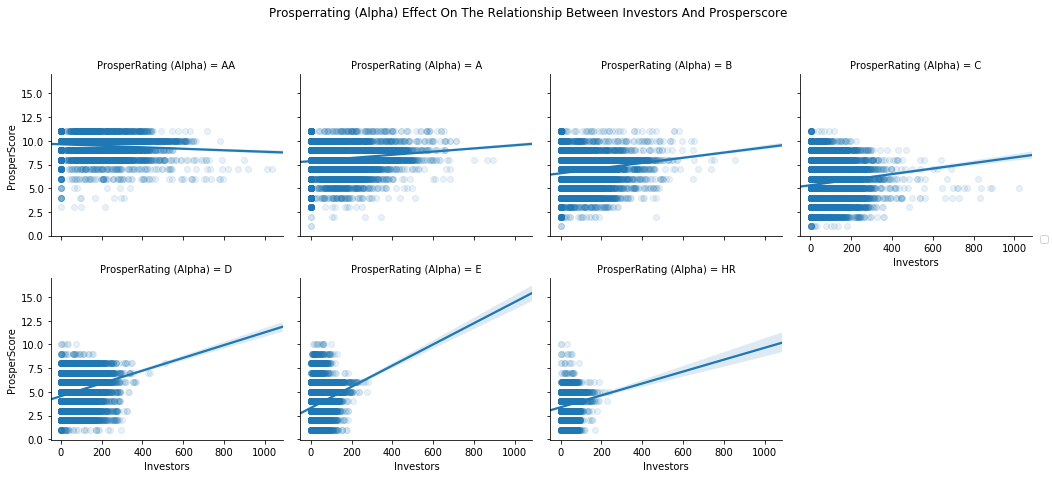

In [20]:
g=sb.FacetGrid(data=loan_df, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'Investors', 'ProsperScore', x_jitter=0.04, scatter_kws={'alpha':0.1})
g.add_legend()
plt.suptitle("ProsperRating (Alpha) effect on the relationship between Investors and ProsperScore".title(), 
             y = 1.1);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [22]:
# Use this command if you are running this file in local
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

!jupyter nbconvert Part_II_slide_deck_Loan_Data_from_Prosper.ipynb --to slides --no-input --no-prompt



[NbConvertApp] Converting notebook Part_II_slide_deck_Loan_Data_from_Prosper.ipynb to slides
[NbConvertApp] Writing 569571 bytes to Part_II_slide_deck_Loan_Data_from_Prosper.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
